# Exploring notebook

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import seaborn as sns
import sys



# makes plots nice
def make_pretty(ax, title='', x_label='', y_label='', img=False):
    ax.set_title(title, fontsize=20)
    ax.set_xlabel(x_label, fontsize=16)
    ax.set_ylabel(y_label, fontsize=16)
    ax.legend(loc='best', fontsize=16)
    if img:
        ax.axis('off')
    return ax

pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', 250)


data_path = os.path.join('nice_combined_data.csv')

In [2]:
df = pd.read_csv(data_path)
df.shape

(6567, 10)

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,mentioned,text,mentioned_count,upvote_ratio,score,gilded,total_awards_received,num_comments,target
0,2021-01-04,AAPL,weekend iv report ticker low iv cheap premium ...,14,0.763571,189.357143,0.428571,5.214286,94.357143,-0.030782
1,2021-01-04,BA,weekend iv report ticker low iv cheap premium ...,5,0.782000,131.000000,0.000000,0.200000,32.800000,-0.034667
2,2021-01-04,BABA,weekend iv report ticker low iv cheap premium ...,8,0.728750,45.250000,0.000000,0.125000,20.750000,0.005960
3,2021-01-04,BB,guess company due diligence without revealing ...,1,0.960000,417.000000,1.000000,2.000000,51.000000,-0.017910
4,2021-01-04,CMCSA,lesson 2020 x200bhi debated make post thought ...,1,0.920000,304.000000,0.000000,0.000000,61.000000,-0.033856


In [4]:
df['target_bin'] = df['target'].apply(lambda x : 1 if x > 0 else 0)

In [5]:
df.head()

,Date,mentioned,text,mentioned_count,upvote_ratio,score,gilded,total_awards_received,num_comments,target,target_bin
0,2021-01-04,AAPL,weekend iv report ticker low iv cheap premium ...,14,0.763571,189.357143,0.428571,5.214286,94.357143,-0.030782,0
1,2021-01-04,BA,weekend iv report ticker low iv cheap premium ...,5,0.782000,131.000000,0.000000,0.200000,32.800000,-0.034667,0
2,2021-01-04,BABA,weekend iv report ticker low iv cheap premium ...,8,0.728750,45.250000,0.000000,0.125000,20.750000,0.005960,1
3,2021-01-04,BB,guess company due diligence without revealing ...,1,0.960000,417.000000,1.000000,2.000000,51.000000,-0.017910,0
4,2021-01-04,CMCSA,lesson 2020 x200bhi debated make post thought ...,1,0.920000,304.000000,0.000000,0.000000,61.000000,-0.033856,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6567 entries, 0 to 6566
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   6567 non-null   datetime64[ns]
 1   mentioned              6567 non-null   object        
 2   text                   6567 non-null   object        
 3   mentioned_count        6567 non-null   int64         
 4   upvote_ratio           6567 non-null   float64       
 5   score                  6567 non-null   float64       
 6   gilded                 6567 non-null   float64       
 7   total_awards_received  6567 non-null   float64       
 8   num_comments           6567 non-null   float64       
 9   target                 6567 non-null   float64       
 10  target_bin             6567 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(2)
memory usage: 564.5+ KB


In [7]:
df = df[df['mentioned_count'] >= 3]
df.shape

(4370, 11)

(3973, 11)
Max:  3523
Min:  3


{'bodies': [<matplotlib.collections.PolyCollection at 0x201ae6c5960>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x201ae6c5900>,
 'cmins': <matplotlib.collections.LineCollection at 0x201ae6c5f30>,
 'cbars': <matplotlib.collections.LineCollection at 0x201ae6c6290>,
 'cmedians': <matplotlib.collections.LineCollection at 0x201ae6c65f0>}

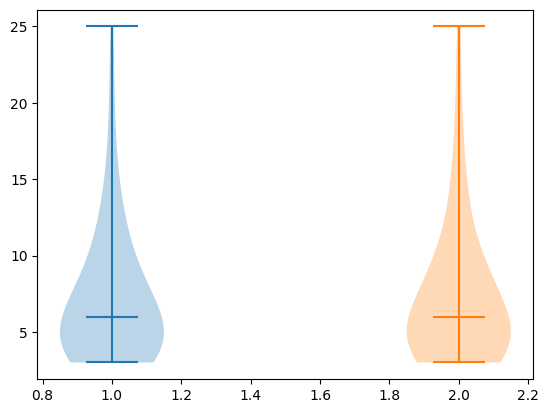

In [8]:
fig, ax = plt.subplots()
mc = df[df['mentioned_count'] <= 25]
print(mc.shape)
print('Max: ', df['mentioned_count'].max())
print('Min: ', df['mentioned_count'].min())
ax.violinplot(mc['mentioned_count'][mc['target_bin'] == 1], showmedians=True, positions=[1], widths=0.3,bw_method=0.5)
ax.violinplot(mc['mentioned_count'][mc['target_bin'] == 0], showmedians=True, positions=[2], widths=0.3,bw_method=0.5)

Excluding outliers here so the plots can be usable (excluding about 400 records)


Max:  1.0
Min:  0.3999999999999999


{'bodies': [<matplotlib.collections.PolyCollection at 0x201ae958bb0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x201ae958b50>,
 'cmins': <matplotlib.collections.LineCollection at 0x201ae959180>,
 'cbars': <matplotlib.collections.LineCollection at 0x201ae9594e0>,
 'cmedians': <matplotlib.collections.LineCollection at 0x201ae959840>}

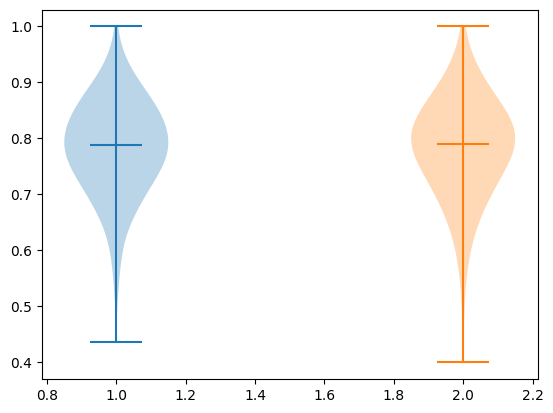

In [9]:
fig, ax = plt.subplots()
print('Max: ', df['upvote_ratio'].max())
print('Min: ', df['upvote_ratio'].min())
ax.violinplot(df['upvote_ratio'][df['target_bin'] == 1], showmedians=True, positions=[1], widths=0.3,bw_method=0.5)
ax.violinplot(df['upvote_ratio'][df['target_bin'] == 0], showmedians=True, positions=[2], widths=0.3,bw_method=0.5)

(3964, 11)
Max:  16102.2
Min:  0.3333333333333333


{'bodies': [<matplotlib.collections.PolyCollection at 0x201ae7b9f00>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x201ae7b9ea0>,
 'cmins': <matplotlib.collections.LineCollection at 0x201ae7ba4d0>,
 'cbars': <matplotlib.collections.LineCollection at 0x201ae7ba830>,
 'cmedians': <matplotlib.collections.LineCollection at 0x201ae7bab90>}

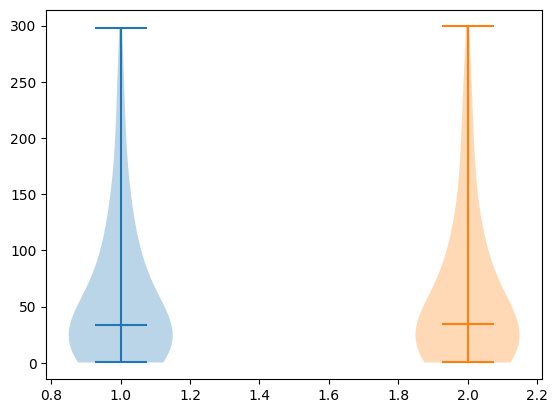

In [10]:
fig, ax = plt.subplots()
mc = df[df['score'] <= 300]
print(mc.shape)
print('Max: ', df['score'].max())
print('Min: ', df['score'].min())
ax.violinplot(mc['score'][mc['target_bin'] == 1], showmedians=True, positions=[1], widths=0.3,bw_method=0.5)
ax.violinplot(mc['score'][mc['target_bin'] == 0], showmedians=True, positions=[2], widths=0.3,bw_method=0.5)

ABout 400 records excluded again

Gilded less than 1

(4349, 11)
Max:  13.5
Min:  0.0


{'bodies': [<matplotlib.collections.PolyCollection at 0x201ae983070>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x201ae983010>,
 'cmins': <matplotlib.collections.LineCollection at 0x201ae983640>,
 'cbars': <matplotlib.collections.LineCollection at 0x201ae9839a0>,
 'cmedians': <matplotlib.collections.LineCollection at 0x201ae983d00>}

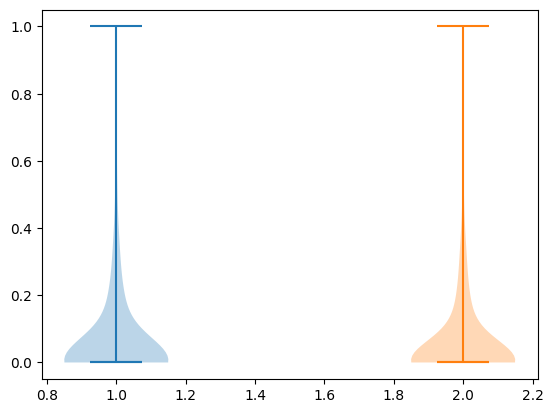

In [11]:
fig, ax = plt.subplots()
mc = df[df['gilded'] <= 1]
print(mc.shape)
print('Max: ', df['gilded'].max())
print('Min: ', df['gilded'].min())
ax.violinplot(mc['gilded'][mc['target_bin'] == 1], showmedians=True, positions=[1], widths=0.3,bw_method=0.5)
ax.violinplot(mc['gilded'][mc['target_bin'] == 0], showmedians=True, positions=[2], widths=0.3,bw_method=0.5)

Gilded other side (greater than 1 gilded)

(30, 11)
Max:  13.5
Min:  0.0


{'bodies': [<matplotlib.collections.PolyCollection at 0x201ae982350>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x201ae76f760>,
 'cmins': <matplotlib.collections.LineCollection at 0x201aea23fd0>,
 'cbars': <matplotlib.collections.LineCollection at 0x201aea58370>,
 'cmedians': <matplotlib.collections.LineCollection at 0x201aea586d0>}

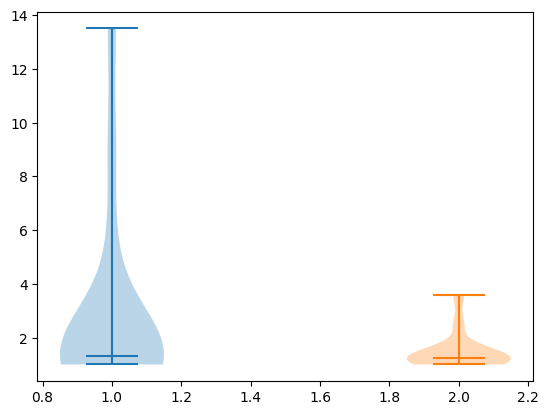

In [12]:
fig, ax = plt.subplots()
mc = df[df['gilded'] >= 1]
print(mc.shape)
print('Max: ', df['gilded'].max())
print('Min: ', df['gilded'].min())
ax.violinplot(mc['gilded'][mc['target_bin'] == 1], showmedians=True, positions=[1], widths=0.3,bw_method=0.5)
ax.violinplot(mc['gilded'][mc['target_bin'] == 0], showmedians=True, positions=[2], widths=0.3,bw_method=0.5)

(4250, 11)
Max:  324.3
Min:  0.0


{'bodies': [<matplotlib.collections.PolyCollection at 0x201aec2c9d0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x201aec2c970>,
 'cmins': <matplotlib.collections.LineCollection at 0x201aec2cfd0>,
 'cbars': <matplotlib.collections.LineCollection at 0x201aec2d330>,
 'cmedians': <matplotlib.collections.LineCollection at 0x201aec2d690>}

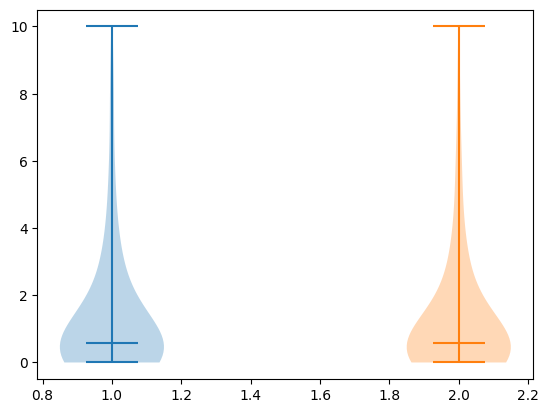

In [13]:
fig, ax = plt.subplots()
mc = df[df['total_awards_received'] <= 10]
print(mc.shape)
print('Max: ', df['total_awards_received'].max())
print('Min: ', df['total_awards_received'].min())
ax.violinplot(mc['total_awards_received'][mc['target_bin'] == 1], showmedians=True, positions=[1], widths=0.3,bw_method=0.5)
ax.violinplot(mc['total_awards_received'][mc['target_bin'] == 0], showmedians=True, positions=[2], widths=0.3,bw_method=0.5)

(4266, 11)
Max:  2811.3888888888887
Min:  0.0


{'bodies': [<matplotlib.collections.PolyCollection at 0x201aea85180>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x201aea85120>,
 'cmins': <matplotlib.collections.LineCollection at 0x201aea85750>,
 'cbars': <matplotlib.collections.LineCollection at 0x201aea85ab0>,
 'cmedians': <matplotlib.collections.LineCollection at 0x201aea85e10>}

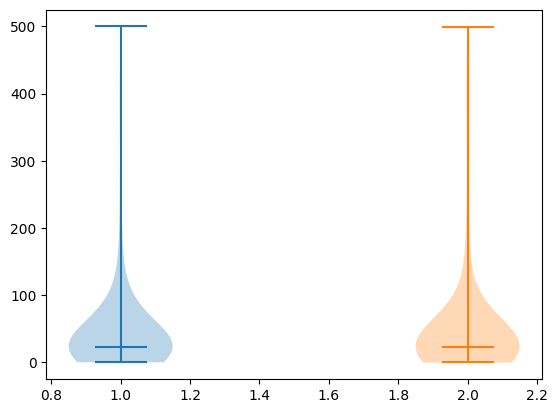

In [14]:
fig, ax = plt.subplots()
mc = df[df['num_comments'] <= 500]
print(mc.shape)
print('Max: ', df['num_comments'].max())
print('Min: ', df['num_comments'].min())
ax.violinplot(mc['num_comments'][mc['target_bin'] == 1], showmedians=True, positions=[1], widths=0.3,bw_method=0.5)
ax.violinplot(mc['num_comments'][mc['target_bin'] == 0], showmedians=True, positions=[2], widths=0.3,bw_method=0.5)

In [15]:
df['target_bin'].value_counts()

0    2255
1    2115
Name: target_bin, dtype: int64

Pretty balanced dataset... Nice

Min of score: 0.3333333333333333
Max of score: 299.2686230248307


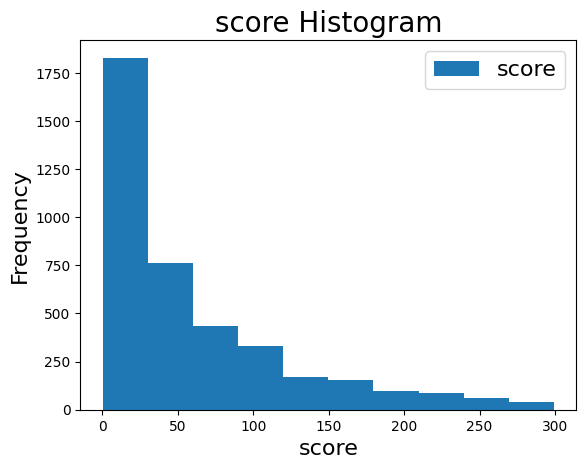

In [19]:
def make_hist(ax, col, df):
    print(f'Min of {col}: {df[col].min()}')
    print(f'Max of {col}: {df[col].max()}')
    ax = df[col].plot(kind='hist', ax=ax)
    make_pretty(ax, f'{col} Histogram', col, 'Frequency')
    
fig, ax = plt.subplots()
mc = df[df['score'] <= 300]
make_hist(ax, 'score', mc)
    